<a href="https://colab.research.google.com/github/Shagunjain10/Youtube_Adview_Prediction/blob/main/Youtube_Adview_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("train.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
data.describe()

,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [ ]:
data.shape

(14999, 9)

In [ ]:
category={'A':1,'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
data['category']=data['category'].map(category)

In [ ]:
data.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
data=data[data.views!='F']

In [ ]:
data.shape

(14997, 9)

In [ ]:
data=data[data.likes!='F']

In [ ]:
data.shape

(14842, 9)

In [ ]:
data=data[data.dislikes!='F']

In [ ]:
data.shape

(14842, 9)

In [ ]:
data=data[data.comment!='F']

In [ ]:
data.shape

(14637, 9)

In [ ]:
data.adview.count()

14637

In [ ]:
data.shape

(14637, 9)

In [ ]:
data['likes']=pd.to_numeric(data['likes'])
data['dislikes']=pd.to_numeric(data['dislikes'])
data['views']=pd.to_numeric(data['views'])
data['comment']=pd.to_numeric(data['comment'])
data['adview']=pd.to_numeric(data['adview'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14637 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14637 non-null  object
 1   adview     14637 non-null  int64 
 2   views      14637 non-null  int64 
 3   likes      14637 non-null  int64 
 4   dislikes   14637 non-null  int64 
 5   comment    14637 non-null  int64 
 6   published  14637 non-null  object
 7   duration   14637 non-null  object
 8   category   14637 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
vidid_column=data['vidid']

In [ ]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data['vidid']=LabelEncoder().fit_transform(data['vidid'])
data['published']=LabelEncoder().fit_transform(data['published'])
#data['duration']=LabelEncoder().fit_transform(data['duration'])

In [ ]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,PT7M37S,6
1,2741,2,1707,56,2,6,2185,PT9M30S,4
2,8138,1,2023,25,0,2,2094,PT2M16S,3
3,9005,6,620860,777,161,153,2119,PT4M22S,8
4,122,1,666,1,0,0,2091,PT31S,4


In [ ]:
import datetime
import time

In [ ]:
# PT4M22S
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
            
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp


In [ ]:
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

In [ ]:
time

0         00:7:37
1         00:9:30
2         00:2:16
3         00:4:22
4        00:00:31
           ...   
14994     00:6:10
14995     00:3:56
14996     00:3:13
14997    00:00:26
14998      00:1:1
Name: duration, Length: 14999, dtype: object

In [ ]:
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [ ]:
time1=time.apply(func_sec)
data["duration"]=time1
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


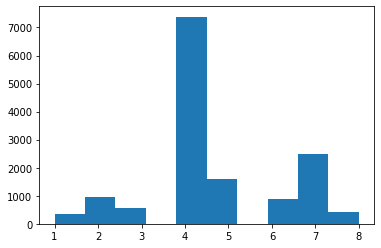

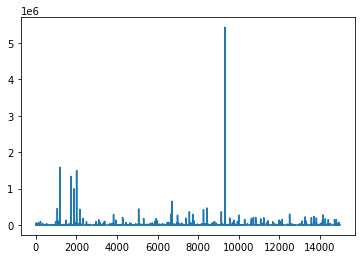

In [ ]:
plt.hist(data["category"])
plt.show()
plt.plot(data["adview"])
plt.show()

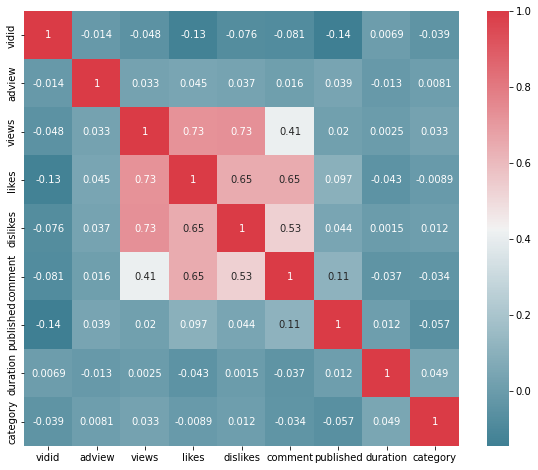

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()


In [ ]:
#sns.pairplot(data)
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


Text(0, 0.5, 'likes')

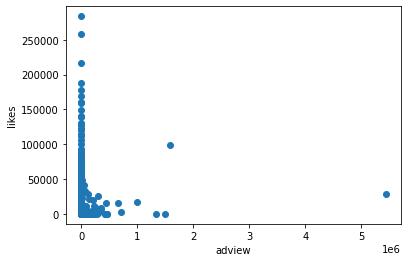

In [ ]:
plt.scatter(data['adview'],data['likes'])
plt.xlabel("adview")
plt.ylabel("likes")

Text(0, 0.5, 'dislikes')

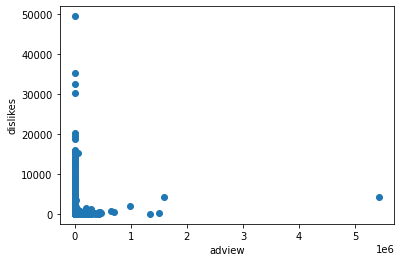

In [ ]:
plt.scatter(data['adview'],data['dislikes'])
plt.xlabel("adview")
plt.ylabel("dislikes")

Text(0, 0.5, 'duration')

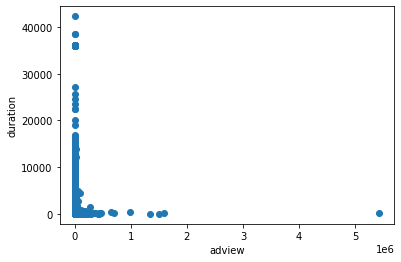

In [ ]:
plt.scatter(data['adview'],data['duration'])
plt.xlabel("adview")
plt.ylabel("duration")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


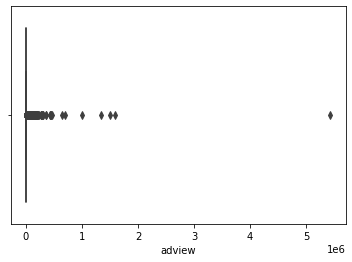

In [ ]:
sns.boxplot(data['adview'])

In [ ]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [ ]:
train_data=data.drop(['vidid','adview','published'],axis=1)

In [ ]:
y=pd.DataFrame(data=data.iloc[:,1].values,columns=['target'])

In [ ]:
train_data.head()

,views,likes,dislikes,comment,duration,category
0,1031602,8523,363,1095,457,6
1,1707,56,2,6,570,4
2,2023,25,0,2,136,3
3,620860,777,161,153,262,8
4,666,1,0,0,31,4


In [ ]:
y.head()

,target
0,40
1,2
2,1
3,6
4,1


In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(train_data,y,test_size=0.2,random_state=40)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(11709, 6)
(2928, 6)
(11709, 1)
(2928, 1)


In [ ]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(xtrain)
X_test=scaler.fit_transform(xtest)


In [ ]:
X_train.shape

(11709, 6)

In [ ]:
X_train.mean()

0.09412375354510435

In [ ]:
# Evaluation Metrics
from sklearn import metrics
from sklearn import accuracy
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
    pritn('Accuracy is ',)


In [ ]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(xtrain, ytrain)
print_error(xtest,ytest, linear_regression)


Mean Absolute Error: 3269.6134692316054
Mean Squared Error: 165573096.4056683
Root Mean Squared Error: 12867.520989128725


In [ ]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(xtrain,ytrain)
#print_error(xtest,ytest, supportvector_regressor)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
print_error(xtest,ytest, supportvector_regressor)

Mean Absolute Error: 940.2664218591456
Mean Squared Error: 152813707.64311495
Root Mean Squared Error: 12361.784160998563


In [ ]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(xtrain, ytrain)
print_error(xtest,ytest, decision_tree)

# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf)
random_forest.fit(xtrain,ytrain)
print_error(xtest,ytest, random_forest)

Mean Absolute Error: 4534.022540983607
Mean Squared Error: 10998422675.534153
Root Mean Squared Error: 104873.36494808467


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 3222.6983602520972
Mean Squared Error: 1364748055.396206
Root Mean Squared Error: 36942.4966048074


In [ ]:
import xgboost as xg

In [ ]:
xgr=xg.XGBRegressor()

In [ ]:
xgr.fit(xtrain,ytrain)

[08:55:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
print_error(xtest,ytest, xgr)

Mean Absolute Error: 6115.706167676735
Mean Squared Error: 13537700831.922956
Root Mean Squared Error: 116351.62582414977


In [ ]:
import keras

In [ ]:
import keras
from keras.layers import Dense
# from tensorflow.python.keras.optimizers import Adam

ann = keras.models.Sequential([
    
    Dense(6, activation="relu",
    input_shape=X_train.shape[1:]),
    Dense(6,activation="relu"),
    Dense(6,activation="relu"),
    Dense(1)
    ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

In [ ]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)


In [ ]:
test_data=pd.read_csv("test.csv")

In [ ]:
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
test_data.describe()

,vidid,views,likes,dislikes,comment,published,duration,category
count,8764,8764,8764,8764,8764,8764,8764,8764
unique,8764,8605,3434,1215,1556,2109,2330,8
top,VID_9841,688,2,0,0,2016-08-26,PT31S,D
freq,1,3,89,662,727,32,120,4419


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      8764 non-null   object
 1   views      8764 non-null   object
 2   likes      8764 non-null   object
 3   dislikes   8764 non-null   object
 4   comment    8764 non-null   object
 5   published  8764 non-null   object
 6   duration   8764 non-null   object
 7   category   8764 non-null   object
dtypes: object(8)
memory usage: 547.9+ KB


In [ ]:
test_data['category']=test_data['category'].map(category)

In [ ]:
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [ ]:
test_data=test_data[test_data.views!='F']
test_data=test_data[test_data.likes!='F']
test_data=test_data[test_data.dislikes!='F']
test_data=test_data[test_data.comment!='F']

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8549 entries, 0 to 8763
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      8549 non-null   object
 1   views      8549 non-null   object
 2   likes      8549 non-null   object
 3   dislikes   8549 non-null   object
 4   comment    8549 non-null   object
 5   published  8549 non-null   object
 6   duration   8549 non-null   object
 7   category   8549 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 601.1+ KB


In [ ]:
test_data['likes']=pd.to_numeric(test_data['likes'])
test_data['dislikes']=pd.to_numeric(test_data['dislikes'])
test_data['views']=pd.to_numeric(test_data['views'])
test_data['comment']=pd.to_numeric(test_data['comment'])


In [ ]:
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [ ]:
test_data['vidid']=LabelEncoder().fit_transform(test_data['vidid'])
test_data['published']=LabelEncoder().fit_transform(test_data['published'])

In [ ]:
test_mp = pd.read_csv("test.csv")["duration"]
test_time = test_mp.apply(checki)

In [ ]:
testtime=test_time.apply(func_sec)
test_data["duration"]=testtime

In [ ]:
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [ ]:
test_data=test_data.drop(['vidid','published'], axis=1)

In [ ]:
test_data.head()

,views,likes,dislikes,comment,duration,category
0,440238,6153,218,1377,449,2
1,1040132,8171,340,1047,389,6
2,28534,31,11,1,2274,4
3,1316715,2284,250,274,595,7
4,1893173,2519,225,116,188,2


In [ ]:
main_testdata=test_data.iloc[:,:].values

In [ ]:
main_testdata.shape

(8549, 6)

In [ ]:
y_testdata=supportvector_regressor.predict(main_testdata)

In [ ]:
y_testdata

array([2.15182597, 3.43878898, 1.16410516, ..., 4.57336349, 2.78311018,
       1.11010728])

In [ ]:
y_testdata.shape

(8549,)

In [ ]:
y_testdata.mean()

2.2391995179055906

In [ ]:
prediction=pd.DataFrame(y_testdata,columns=['adview'])

In [ ]:
prediction.tail(20)

,adview
8529,1.847224
8530,1.626966
8531,1.639991
8532,4.161885
8533,1.521964
8534,1.710811
8535,1.147206
8536,1.104265
8537,1.899648
8538,3.270088


In [ ]:
prediction.to_csv("Predictions_Submission.csv")